Reference: https://momonoki2017.blogspot.com/2018/03/pythonfft-4.html

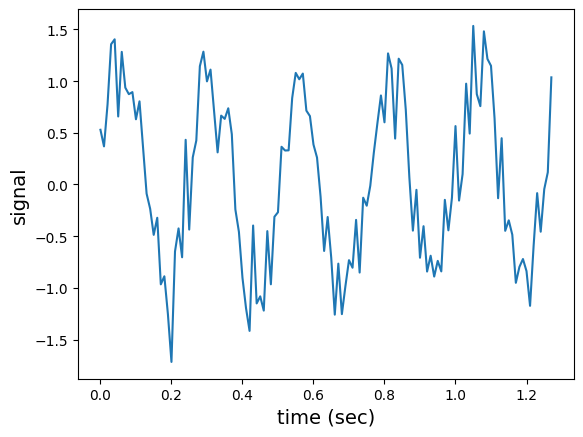

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0) # 乱数seed固定

# 簡単な信号の作成(正弦波 + ノイズ)
N = 128   # サンプル数
dt = 0.01 # サンプリング周期(sec)
freq = 4  # 周波数(Hz)
amp = 1   # 振幅

t = np.arange(0, N*dt, dt) # 時間軸
f = amp * np.sin(2*np.pi*freq*t) + np.random.randn(N)*0.3 # 信号

# グラフ表示
plt.xlabel('time (sec)', fontsize=14)
plt.ylabel('signal', fontsize=14)
plt.plot(t, f)
plt.show()

In [8]:
# 高速フーリエ変換(FFT)
F = np.fft.fft(f)

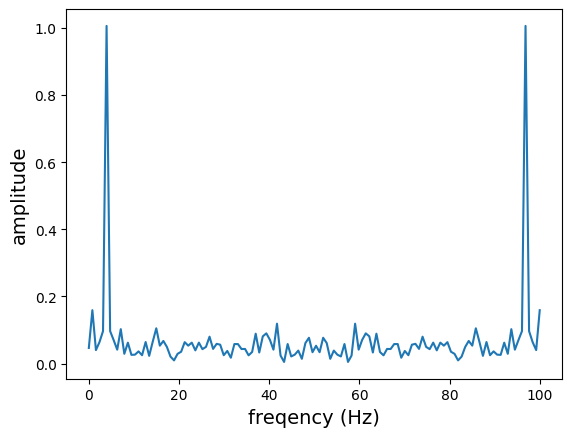

In [21]:
# FFTの複素数結果を絶対値に変換
F_abs = np.abs(F)

# 振幅をもとの信号に揃える
F_abs_amp = F_abs / N * 2        # 交流成分はデータ数で割って2倍
F_abs_amp[0] = F_abs_amp[0] / 2  # 直流成分（今回は扱わないけど）は2倍不要

# 周波数軸のデータ作成
fq = np.linspace(0, 1.0 / dt, N) # 周波数軸　linspace(開始,終了,分割数)

# グラフ表示（FFT解析結果）
plt.xlabel('freqency (Hz)', fontsize=14)
plt.ylabel('amplitude', fontsize=14)
plt.plot(fq, F_abs_amp)
plt.show()

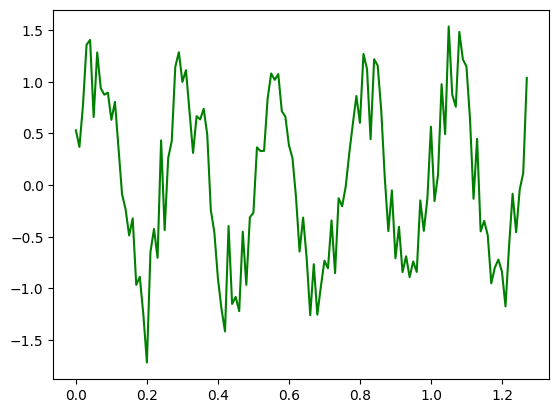

In [12]:
# そのまま普通にIFFTで逆変換した場合
F_ifft = np.fft.ifft(F)   # IFFT
F_ifft_real = F_ifft.real # 実数部
plt.plot(t, F_ifft_real, c="g") # グラフ
plt.show()

In [13]:
F2 = np.copy(F) # FFT結果コピー

今回は周波数10を超えるデータはノイズとみなして、フィルタリング処理でデータをゼロにしちゃおう。フィルタリングに使う周波数をカットオフとも言うよ。

In [14]:
# 周波数でフィルタリング処理
fc = 10           # カットオフ（周波数）
F2[(fq > fc)] = 0 # カットオフを超える周波数のデータをゼロにする（ノイズ除去）

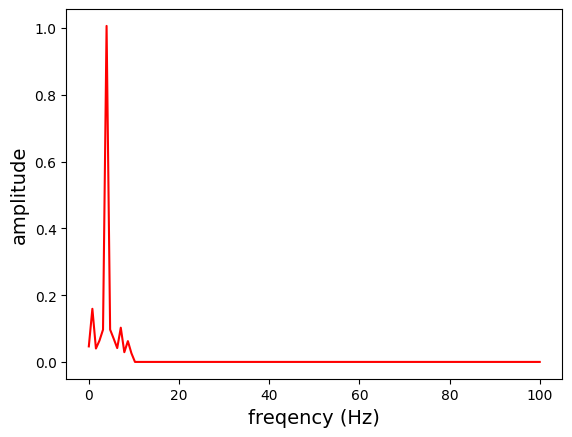

In [20]:
# フィルタリング処理したFFT結果の確認
# FFTの複素数結果を絶対値に変換
F2_abs = np.abs(F2)
# 振幅をもとの信号に揃える
F2_abs_amp = F2_abs / N * 2       # 交流成分はデータ数で割って2倍
F2_abs_amp[0] = F2_abs_amp[0] / 2 # 直流成分（今回は扱わないけど）は2倍不要

# グラフ表示（FFT解析結果）
plt.xlabel('freqency (Hz)', fontsize=14)
plt.ylabel('amplitude', fontsize=14)
plt.plot(fq, F2_abs_amp, c='r')

In [16]:
# 周波数でフィルタリング（ノイズ除去）-> IFFT
F2_ifft = np.fft.ifft(F2) # IFFT

あとの処理は最初のときと一緒だけど、IFFTの結果から実数部を取得した値は2倍しておいてね。フィルタリングでナイキスト周波数以降も全部ゼロにしちゃったから、振幅を揃えるために必要だよ。

In [17]:
F2_ifft_real = F2_ifft.real * 2 # 実数部の取得、振幅を元スケールに戻す

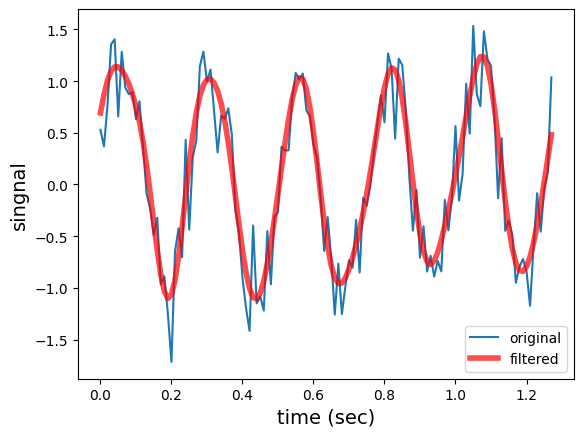

In [22]:
# グラフ表示：オリジナルとフィルタリング（ノイズ除去）
plt.plot(t, f, label='original')
plt.plot(t, F2_ifft_real, c="r", linewidth=4, alpha=0.7, label='filtered')
plt.legend(loc='best')
plt.xlabel('time (sec)', fontsize=14)
plt.ylabel('singnal', fontsize=14)
plt.show()

さっきは周波数でフィルタリングしたけど、次は振幅でフィルターリングを試してみよう。

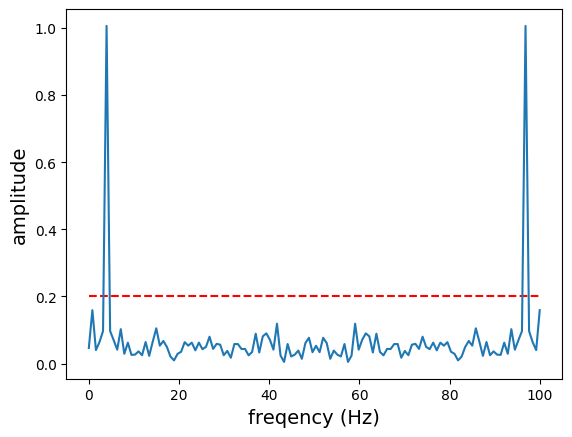

In [26]:
# グラフ再表示（FFT結果・フィルタリングなし)
plt.xlabel('freqency (Hz)', fontsize=14)
plt.ylabel('amplitude', fontsize=14)
plt.hlines(y=[0.2], xmin=0, xmax=100, colors='r', linestyles='dashed')
plt.plot(fq, F_abs_amp)
plt.show()

上のグラフを参考に、一定振幅より小さいデータはゼロにしちゃおう。たとえば赤破線より小さい振幅は全てカットとかね。

In [28]:
# 振幅強度でフィルタリング処理
F3 = np.copy(F) # FFT結果コピー
ac = 0.2 # 振幅強度の閾値
F3[(F_abs_amp < ac)] = 0 # 振幅が閾値未満はゼロにする（ノイズ除去）

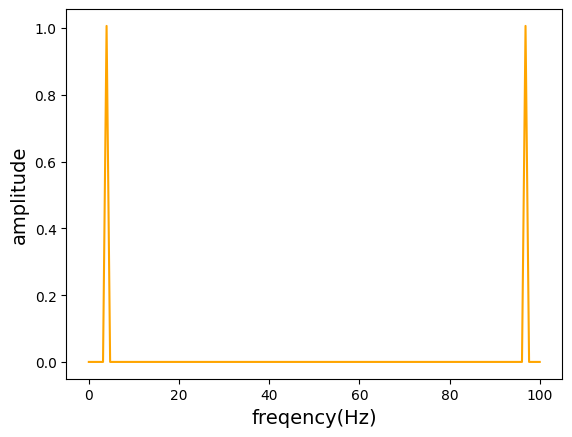

In [30]:
# 振幅でフィルタリング処理した結果の確認
# FFTの複素数結果を絶対値に変換
F3_abs = np.abs(F3)
# 振幅をもとの信号に揃える
F3_abs_amp = F3_abs / N * 2 # 交流成分はデータ数で割って2倍
F3_abs_amp[0] = F3_abs_amp[0] / 2 # 直流成分（今回は扱わないけど）は2倍不要

# グラフ表示（FFT解析結果）
plt.xlabel('freqency(Hz)', fontsize=14)
plt.ylabel('amplitude', fontsize=14)
plt.plot(fq, F3_abs_amp, c='orange')
plt.show()

グラフ右側の鏡像ピーク（ナイキスト周波数超）もカットした方がいいの？


どっちでも大丈夫だけど、カットするのも面倒だからそのままでいいよ。その代わりさっきと違って、IFFTで逆変換したあと実数部の2倍は不要だよ。

ナイキスト周波数とは、サンプリング周波数の半分の周波数のことです。
一般的なwav形式のサンプリング周波数44100Hzならば、22050Hzということです。
これが、FFTで正しく検出できる、最大の周波数となります。

つまり、検出したい周波数があるならば、その倍のサンプリング間隔が必要ということです。
これを標本化定理と言います。
標本化とはサンプリングのことですので、サンプリング定理とも言います。

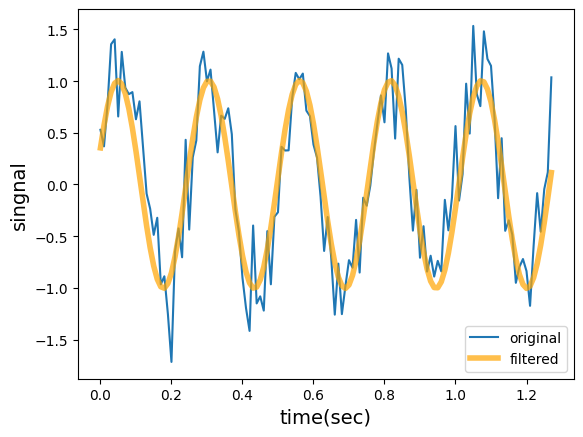

In [31]:
# 振幅強度でフィルタリング（ノイズ除去）-> IFFT
F3_ifft = np.fft.ifft(F3) # IFFT
F3_ifft_real = F3_ifft.real # 実数部の取得
# グラフ（オリジナルとフィルタリングを比較）
plt.plot(t, f, label='original')
plt.plot(t, F3_ifft_real, c="orange", linewidth=4, alpha=0.7, label='filtered')
plt.legend(loc='best')
plt.xlabel('time(sec)', fontsize=14)
plt.ylabel('singnal', fontsize=14)
plt.show()

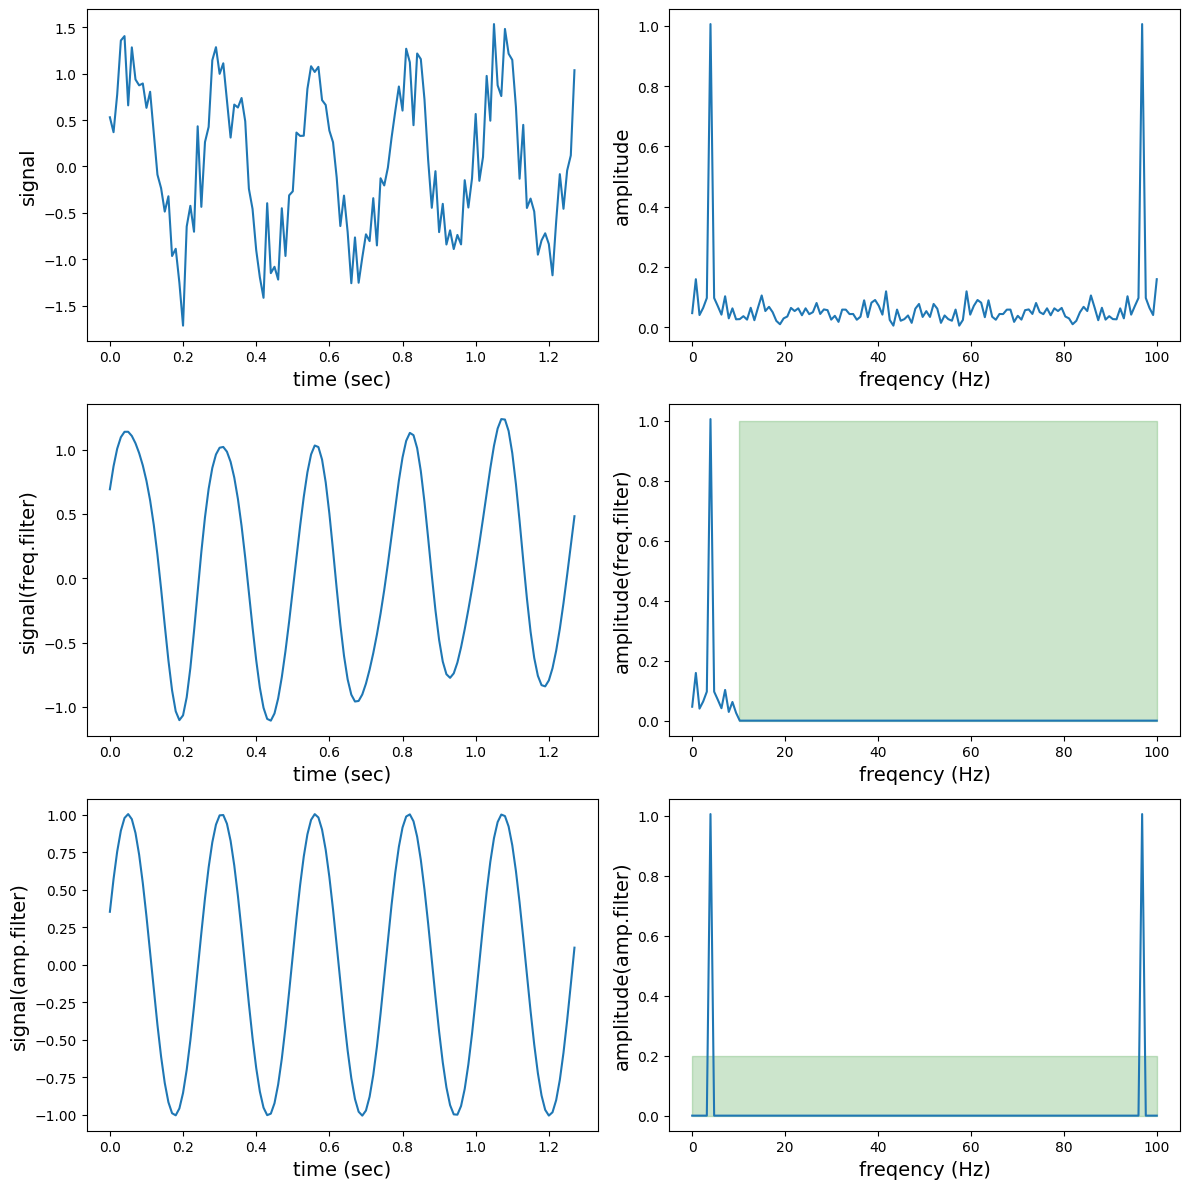

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0) # 乱数seed固定

# 簡単な信号の作成(正弦波 + ノイズ)
N = 128 # サンプル数
dt = 0.01 # サンプリング周期(sec)
freq = 4 # 周波数(Hz)
amp = 1 # 振幅

t = np.arange(0, N*dt, dt) # 時間軸
f = amp * np.sin(2*np.pi*freq*t) + np.random.randn(N)*0.3 # 信号

# 高速フーリエ変換(FFT)
F = np.fft.fft(f)
F_abs = np.abs(F) # 複素数を絶対値に変換
F_abs_amp = F_abs / N * 2 # 振幅をもとの信号に揃える(交流成分2倍)
F_abs_amp[0] = F_abs_amp[0] / 2 # 振幅をもとの信号に揃える(直流成分非2倍)

# 周波数軸のデータ作成
fq = np.linspace(0, 1.0/dt, N) # 周波数軸　linspace(開始,終了,分割数)

# フィルタリング①（周波数でカット）＊＊＊＊＊＊
F2 = np.copy(F) # FFT結果コピー
fc = 10 # カットオフ（周波数）
F2[(fq > fc)] = 0 # カットオフを超える周波数のデータをゼロにする（ノイズ除去）
F2_abs = np.abs(F2) # FFTの複素数結果を絶対値に変換
F2_abs_amp = F2_abs / N * 2 # 振幅をもとの信号に揃える(交流成分2倍)
F2_abs_amp[0] = F2_abs_amp[0] / 2 # 振幅をもとの信号に揃える(直流成分非2倍)
F2_ifft = np.fft.ifft(F2) # IFFT
F2_ifft_real = F2_ifft.real * 2 # 実数部の取得、振幅を元スケールに戻す

# フィルタリング②（振幅強度でカット）＊＊＊＊＊＊
F3 = np.copy(F) # FFT結果コピー
ac = 0.2 # 振幅強度の閾値
F3[(F_abs_amp < ac)] = 0 # 振幅が閾値未満はゼロにする（ノイズ除去）
F3_abs = np.abs(F3)# 複素数を絶対値に変換
F3_abs_amp = F3_abs / N * 2 # 交流成分はデータ数で割って2倍
F3_abs_amp[0] = F3_abs_amp[0] / 2 # 直流成分（今回は扱わないけど）は2倍不要
F3_ifft = np.fft.ifft(F3) # IFFT
F3_ifft_real = F3_ifft.real # 実数部の取得

# グラフ表示
fig = plt.figure(figsize=(12, 12))

# グラフ表示
# オリジナル信号
fig.add_subplot(321) 
plt.xlabel('time (sec)', fontsize=14)
plt.ylabel('signal', fontsize=14)
plt.plot(t, f)

# オリジナル信号 ->FFT
fig.add_subplot(322) 
plt.xlabel('freqency (Hz)', fontsize=14)
plt.ylabel('amplitude', fontsize=14)
plt.plot(fq, F_abs_amp)

# オリジナル信号 ->FFT ->周波数filter ->IFFT
fig.add_subplot(323) 
plt.xlabel('time (sec)', fontsize=14)
plt.ylabel('signal(freq.filter)', fontsize=14)
plt.plot(t, F2_ifft_real)

# オリジナル信号 ->FFT ->周波数filter
fig.add_subplot(324) 
plt.xlabel('freqency (Hz)', fontsize=14)
plt.ylabel('amplitude(freq.filter)', fontsize=14)
# plt.vlines(x=[10], ymin=0, ymax=1, colors='r', linestyles='dashed')
plt.fill_between([10 ,100], [0, 0], [1, 1], color='g', alpha=0.2)
plt.plot(fq, F2_abs_amp)

# オリジナル信号 ->FFT ->振幅強度filter ->IFFT
fig.add_subplot(325) 
plt.xlabel('time (sec)', fontsize=14)
plt.ylabel('signal(amp.filter)', fontsize=14)
plt.plot(t, F3_ifft_real)

# オリジナル信号 ->FFT ->振幅強度filter
fig.add_subplot(326) 
plt.xlabel('freqency (Hz)', fontsize=14)
plt.ylabel('amplitude(amp.filter)', fontsize=14)
# plt.hlines(y=[0.2], xmin=0, xmax=100, colors='r', linestyles='dashed')
plt.fill_between([0 ,100], [0, 0], [0.2, 0.2], color='g', alpha=0.2)
plt.plot(fq, F3_abs_amp)

plt.tight_layout()
plt.show()